### Importing necessery libraries.

In [1]:
import os
from PIL import Image
import numpy as np
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from cv2 import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.layers import BatchNormalization

Making a list of fruits and vegatables. Using os library to get images from train directory.

In [2]:
path = './train/'
fruitsAndVegs = []
for x in os.listdir(path):
    fruitsAndVegs.append(x)

Describe image sizes and creating empty data list and label list. Datas will be our images converted from jpg to numpy arrays.

In [3]:
data=[]
labels=[]
im_w = 224
im_h = 224

Creating a loop to read images from train directory, than converting images to numpy arrays. Adding labels to the belonging images. 2 images looks exist in directory but they are curropted somehow, so skipping them.

In [4]:
for x in range(len(fruitsAndVegs)):
    sub_path = path+fruitsAndVegs[x]+'/'
    for y in os.listdir(sub_path):        
        img_path = sub_path+y  
        last = img_path[-12:]
        imag=cv2.imread(img_path)  
        if last == 'Image_56.jpg':
            continue
        if last == 'Image_96.jpg': 
            continue
        img_from_ar = Image.fromarray(imag, 'RGB')
        resized_image = img_from_ar.resize((im_w, im_h))
        data.append(np.array(resized_image))
        labels.append(x)

Shuffling labels and data

In [5]:
categories=np.array(data)
labels=np.array(labels)

s=np.arange(categories.shape[0])
np.random.shuffle(s)
categories=categories[s]
labels=labels[s]

num_classes=len(np.unique(labels))
data_length=len(categories)

Prepare datas and categories before model create.

In [6]:
(x_train,x_test)=categories[(int)(0.1*data_length):],categories[:(int)(0.1*data_length)]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
train_length=len(x_train)
test_length=len(x_test)

(y_train,y_test)=labels[(int)(0.1*data_length):],labels[:(int)(0.1*data_length)]

y_train=np_utils.to_categorical(y_train,num_classes)
y_test=np_utils.to_categorical(y_test,num_classes)

## Create Model
<p>This is our model for convolutional neural network. Keras Conv2D class will be used. Relu function for activation, maxpooliing and batch normalization. We have 36 different categories so dense is 36 at last and softmax will be used.</p>

In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(im_w,im_h,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(36, activation = 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 111, 111, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                        

 Fitting our train data and putting an early stop to prevent waste of time and ascending data loss.

In [8]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=17)
history = model.fit(x_train,y_train,batch_size=50, epochs=90,verbose=1, validation_split=0.33, callbacks=[early_stop])

score = model.evaluate(x_test, y_test, verbose=1)
print('\n', 'Test accuracy:', score[1])

Epoch 1/90
37/37 [==============================] - 11s 142ms/step - loss: 3.2865 - accuracy: 0.1322 - val_loss: 3.7091 - val_accuracy: 0.0220
Epoch 2/90
37/37 [==============================] - 3s 86ms/step - loss: 2.2619 - accuracy: 0.3469 - val_loss: 4.4335 - val_accuracy: 0.0429
Epoch 3/90
37/37 [==============================] - 3s 84ms/step - loss: 1.8633 - accuracy: 0.4407 - val_loss: 4.3821 - val_accuracy: 0.0220
Epoch 4/90
37/37 [==============================] - 3s 84ms/step - loss: 1.5603 - accuracy: 0.5317 - val_loss: 4.6740 - val_accuracy: 0.0407
Epoch 5/90
37/37 [==============================] - 3s 84ms/step - loss: 1.3092 - accuracy: 0.6054 - val_loss: 5.7957 - val_accuracy: 0.0341
Epoch 6/90
37/37 [==============================] - 3s 85ms/step - loss: 1.1472 - accuracy: 0.6450 - val_loss: 4.9405 - val_accuracy: 0.0297
Epoch 7/90
37/37 [==============================] - 3s 89ms/step - loss: 0.9056 - accuracy: 0.7306 - val_loss: 4.7742 - val_accuracy: 0.0429
Epoch 8/90


Model loss visual

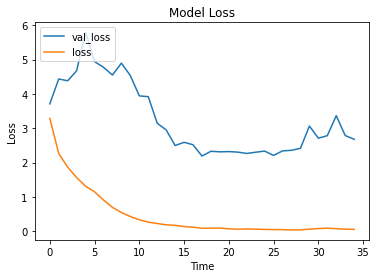

In [9]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel('Time')
plt.legend(['val_loss', 'loss'], loc='upper left')
plt.show()

Model accuracy visual

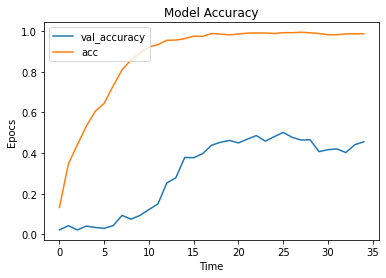

In [10]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Epocs")
plt.xlabel('Time')
plt.legend(['val_accuracy', 'acc'], loc='upper left')
plt.show()

## Predictions

An empty list for prediction and accuracy

In [20]:
pred_list = []
acc_list = []

Function is setting the images size same as set before. Converting image to numpy for prediction.

In [21]:
def convert_to_array(img):
    im = cv2.imread(img)
    img = Image.fromarray(im, 'RGB')
    image = img.resize((im_w, im_h))
    return np.array(image)

Function for the result what prediction is.

In [22]:
def get_fruit_name(label):
    return fruitsAndVegs[label] 

Main function for prediction, accuracy score and the result.

In [26]:
def predict_fruit(file):
    print("Predicting .................................")
    ar=convert_to_array(file)
    ar=ar/255
    a=[]
    a.append(ar)
    a=np.array(a)
    score=model.predict(a,verbose=1)
    #print(score)
    label_index=np.argmax(score)
    #print(label_index)
    acc=np.max(score)
    fruitAndVegs=get_fruit_name(label_index)
    pred_list.append(fruit)
    acc_list.append(acc)
    print("The predicted fruit is a "+fruit+" with accuracy =    "+str(acc))

Creating a list for images in test directory.

In [27]:
test_path = './test/'
t_fruitsAndVegs = []
for x in os.listdir(test_path):
    t_fruitsAndVegs.append(x)

Predicting images in test list.

In [28]:
for x in range(len(t_fruitsAndVegs)):
    sub_path = test_path+t_fruitsAndVegs[x]+'/'
    for y in os.listdir(sub_path):
        img_path = sub_path+y
        predict_fruit(img_path)

Predicting .................................
1/1 [==============================] - 0s 19ms/step


NameError: name 'fruits' is not defined

Creating a list in test directory. These are real images and they will be compare with the predicted results.This list will be a kind of manual confusion matrix.

In [ ]:
real_fruitsAndVegs = []
for f in fruitsAndVegs:
    for i in range(10):
        real_fruitsAndVegs.append(f)

Creating a table including real images, predicted images and score for per image.

In [ ]:
complist = list(zip(pred_list, real_fruitsAndVegs, acc_list))

Checking the prediction is true or false.

In [ ]:
tp,fp = 0,0
for i in range(len(complist)):
    if complist[i][0] == complist[i][1]:
        tp += 1
    else:
        fp += 1

Creating a precision rate.

In [ ]:
rate = tp/(tp+fp)
tp,fp,rate

In [ ]:
complist

## Save Model

In [ ]:
import joblib
joblib.dump(model, "fruits_vegs_CNN_model.sav")